In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
%matplotlib inline

In [3]:
# Dataset
clean_data_path = 'dataset/autos.csv'
df = pd.read_csv(clean_data_path, encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

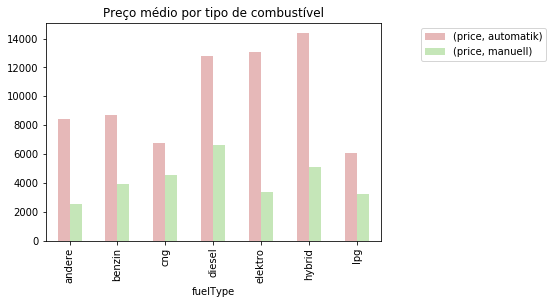

In [9]:
# Crie um Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

# Agrupando os dados
df2 = df[['fuelType', 'gearbox','price']][df['price'] < 100000].groupby(['fuelType', 'gearbox']).mean().unstack(level=1)

# Quantidade
num = len(df2.price.index)

# Criando a lista de cores
listaHSV = [(x*2.0/num, 0.2, 0.9) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico
ax1 = df2.plot(kind='bar', color=listaRGB, title='Preço médio por tipo de combustível')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

fig = ax1.get_figure()

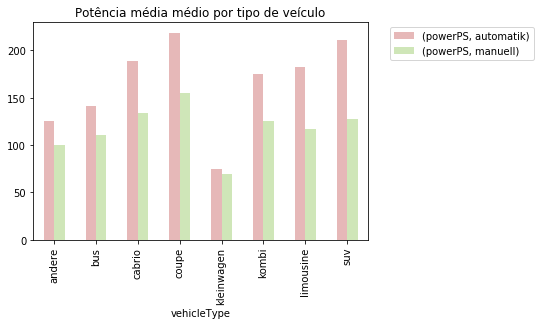

In [6]:
# Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

# Agrupando os dados
df2 = df[['vehicleType', 'gearbox','powerPS']].groupby(['vehicleType', 'gearbox']).mean().unstack(level=1)

# Quantidade
num = len(df2.powerPS.index)

# Criando a lista de cores
listaHSV = [(x*2.0/num, 0.2, 0.9) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico
ax1 = df2.plot(kind='bar', color=listaRGB, title='Potência média médio por tipo de veículo')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

fig = ax1.get_figure()

In [8]:
# Salvando o plot
fig.savefig("plots/Analise3/vehicletype-fueltype-power.png")